# TASK 1: Branch Prediction (Oracle)

Результаты реализации идеального conditional branch predictor с 0 mpki.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../task1/')
from my_utils import *

CHAMPSIM_PATH = '/home/dadrozdov/repos/ChampSim'
TRACES_PATH = '/home/dadrozdov/repos/ChampSim/tasks/task_traces'

WARMUP_INSTRUCTIONS = 5_000_000
SIMULATION_INSTRUCTIONS = 20_000_000

In [3]:
base_metrics = obtain_perf_metrics(TRACES_PATH, CHAMPSIM_PATH, "champsim_config_lru.json")

mkdir /home/dadrozdov/repos/ChampSim/.csconfig/ec2f58e4/obj
mkdir /home/dadrozdov/repos/ChampSim/.csconfig/ec2f58e4/btbDbasic_btb
mkdir /home/dadrozdov/repos/ChampSim/.csconfig/ec2f58e4/branchDbimodal
mkdir /home/dadrozdov/repos/ChampSim/.csconfig/ec2f58e4/prefetcherDno
mkdir /home/dadrozdov/repos/ChampSim/.csconfig/ec2f58e4/prefetcherDno_instr
mkdir /home/dadrozdov/repos/ChampSim/.csconfig/ec2f58e4/replacementDlru
g++ --std=c++17 -O3 -Wall -Wextra -Wshadow -Wpedantic -MMD -I/home/dadrozdov/repos/ChampSim/inc -isystem /home/dadrozdov/repos/ChampSim/vcpkg_installed/x64-linux/include -I/home/dadrozdov/repos/ChampSim/src -I/home/dadrozdov/repos/ChampSim/.csconfig/ec2f58e4/inc  -c -o /home/dadrozdov/repos/ChampSim/.csconfig/ec2f58e4/obj/cache.o /home/dadrozdov/repos/ChampSim/src/cache.cc
g++ --std=c++17 -O3 -Wall -Wextra -Wshadow -Wpedantic -MMD -I/home/dadrozdov/repos/ChampSim/inc -isystem /home/dadrozdov/repos/ChampSim/vcpkg_installed/x64-linux/include -I/home/dadrozdov/repos/ChampSim/sr

In [ ]:
mru_metrics = obtain_perf_metrics(TRACES_PATH, CHAMPSIM_PATH, "champsim_config_mru.json")

In [47]:
import pandas as pd

pd.DataFrame(base_metrics).to_csv("base_metrics.csv")
pd.DataFrame(mru_metrics).to_csv("mru_metrics.csv")

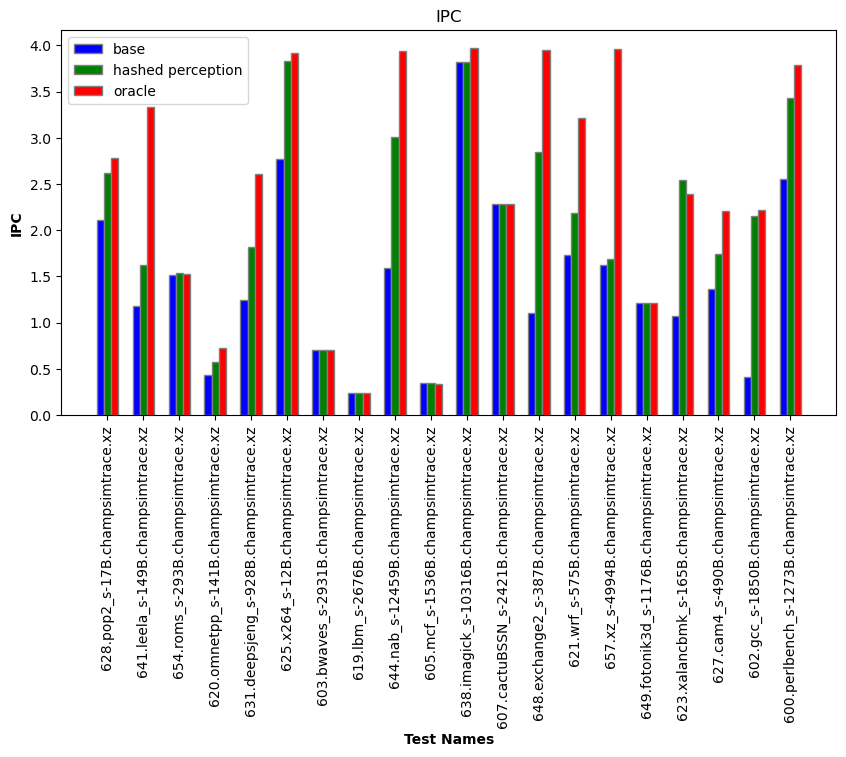

In [44]:
plot_metric([base_metrics, mru_metrics], 0, "IPC", ["base", "hashed perception", "oracle"])

In [54]:
base_ipc_s = list(map(lambda x: x[1][0], base_metrics.items()))
oracle_ipc_s = list(map(lambda x: x[1][0], mru_metrics.items()))
total = 0
for b, o in zip(base_ipc_s, oracle_ipc_s):
  total += o / b - 1
print(f"Average IPC increase {total / len(base_ipc_s) * 100} %")

Average IPC increase 87.50486315902573 %


> Какой прирост IPC получился?

В среднем увеличился на 87%.

In [ ]:
plot_metric([base_metrics, mru_metrics], 0, "IPC", ["base", "hashed perception", "oracle"])
